In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
data = pd.read_csv('Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Simple Linear Regression

### y = b_0 + b_1 * x_1

y : dependent variable (dv)

x_1 : independent variable (iv)


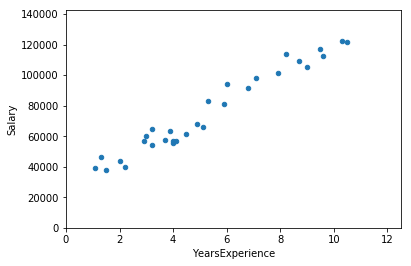

In [4]:
data.plot(x = 'YearsExperience', y = 'Salary',
          kind='scatter', xlim=[0,max(data['YearsExperience'])+2], 
          ylim=[0,max(data.Salary)+20000])

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
# replace cross_validation with the new library name: model_selection
# cross_validation is being deprecated
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 1/3, random_state=0)

In [7]:
print('X_train size:',X_train.shape)
print('X_test size:',X_test.shape)

X_train size: (20, 1)
X_test size: (10, 1)


## Fitting Simple Linear Regression Model to the Training Set

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regressor = LinearRegression()
regressor1 = LinearRegression(fit_intercept=True, normalize=True) #another trial with intercept and normalization
# paramaters: fit_intercept = True : whether to calculate the intercept for this model. 
#If set to False, no intercept will be used in calculations 
#(e.g. data is expected to be already centered)
# n_jobs = number of CPUs to be used

In [40]:
regressor.fit(X_train, y_train)
regressor1.fit(X_train, y_train, sample_weight= np.ones([20,]))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [41]:
print('Regressor Coefficients for default regressor:',regressor.coef_)
print('Intercept for default regressor:',regressor.intercept_,'\n')

print('Regressor Coefficients for regressor 1:',regressor1.coef_)
print('Intercept for regressor 1:',regressor1.intercept_)

Regressor Coefficients for default regressor: [9345.94244312]
Intercept for default regressor: 26816.192244031176 

Regressor Coefficients for regressor 1: [9345.94244312]
Intercept for regressor 1: 26816.19224403117


## Predicting the Test set results

In [42]:
y_pred = regressor.predict(X_test)

In [43]:
y_comp=pd.DataFrame({'pred' : y_pred, 'actual' : y_test})

In [44]:
y_comp

,actual,pred
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


## Visualizing the Test Set Results

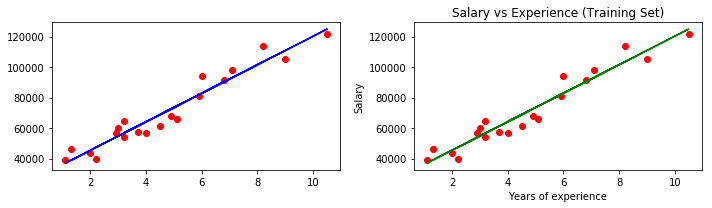

In [63]:
f = plt.figure(figsize=[10,3])
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.scatter(X_train, y_train, color='red')
ax.plot(X_train,regressor.predict(X_train), color = 'b' )
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

ax2.scatter(X_train, y_train, color='red')
ax2.plot(X_train,regressor1.predict(X_train), color = 'g' )
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
f.tight_layout()


Text(0,0.5,'Salary')

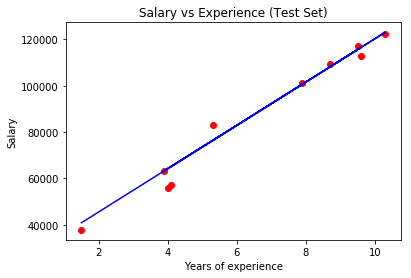

In [64]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test,regressor.predict(X_test), color = 'b' ) #plots the same line as X_train does
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

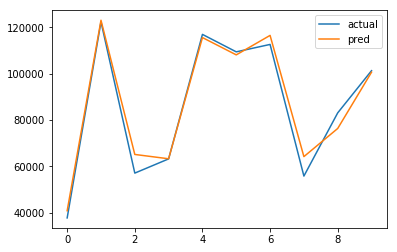

In [73]:
y_comp.plot()

10